 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [83]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [119]:
# Reading whale returns
whale_csv =  Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csv, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
# whale_df = pd.read_csv(whale_csv)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [121]:
# whale_df.reset_index(inplace=True)
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [120]:
# Count nulls
print(whale_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [117]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [79]:
# Reading algorithmic returns
algo_returns_csv =  Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [80]:
# algo_returns_df.reset_index(inplace=True)
algo_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [81]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [109]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [88]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [89]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [95]:
# Fix Data Types
sp_tsx_history["Close"]= sp_tsx_history["Close"].str.replace('$','').str.replace(',', '').astype('float')
sp_tsx_history.sort_index(inplace = True)
sp_tsx_history


<ipython-input-95-a8648f1efe90>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history["Close"]= sp_tsx_history["Close"].str.replace('$','').str.replace(',', '').astype('float')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [97]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [98]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace=True)
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [100]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history.rename(columns = {"Close":"Close_sp"}, inplace = True)
sp_tsx_history

,Close_sp
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [160]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#cat 
all_returns = pd.concat([whale_df, algo_returns_df, sp_tsx_daily_returns], axis="columns", join="inner")
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close_sp
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

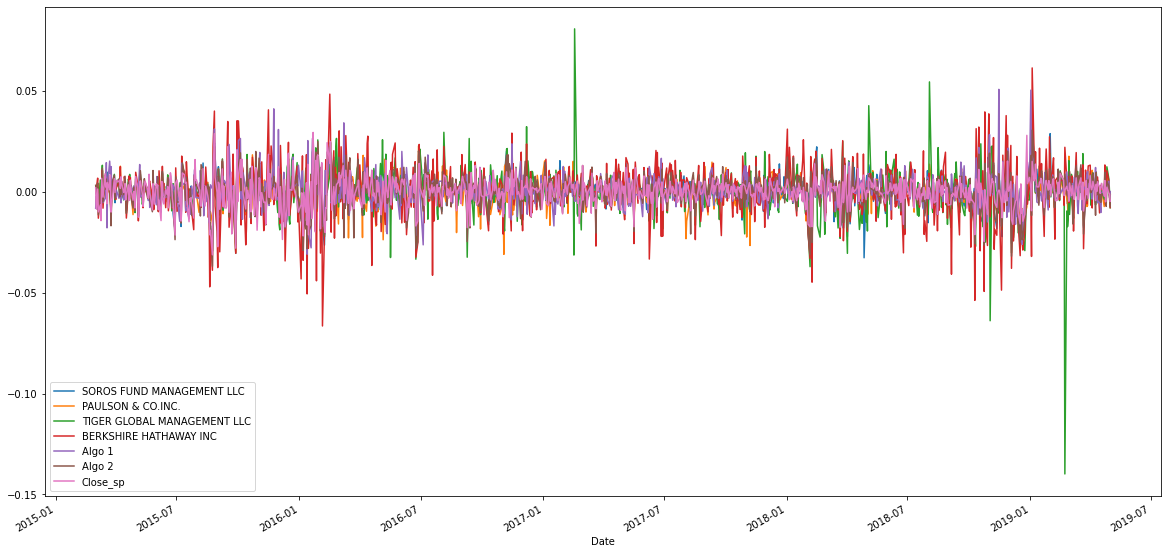

In [162]:
# Plot daily returns of all portfolios

all_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

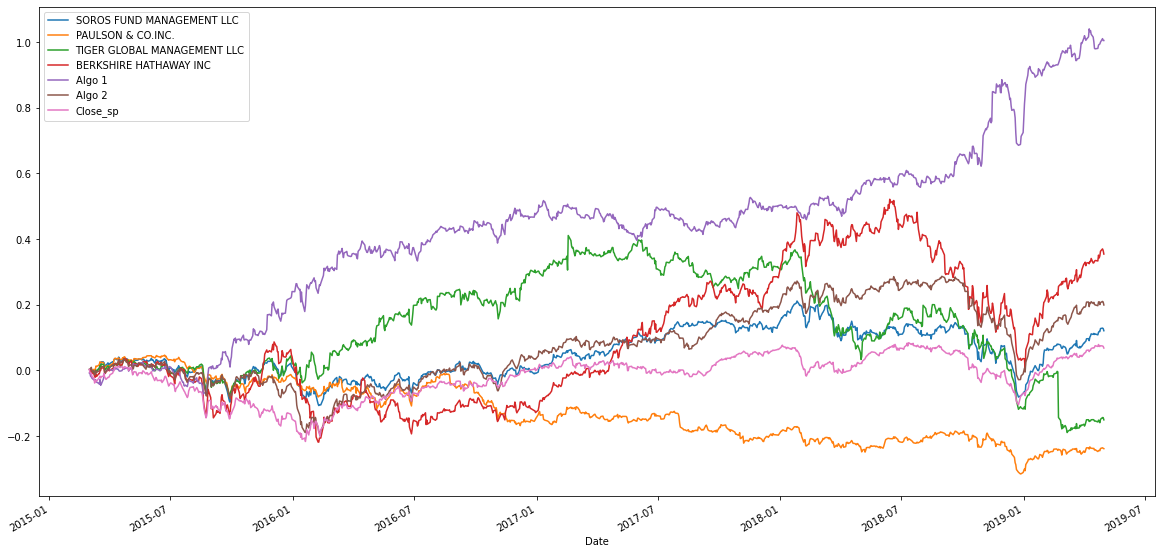

In [164]:
# Calculate cumulative returns of all portfolios and # Plot cumulative returns
all_cumulative_returns = (1 +all_returns).cumprod() - 1
all_cumulative_returns.plot(figsize = (20,10))



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

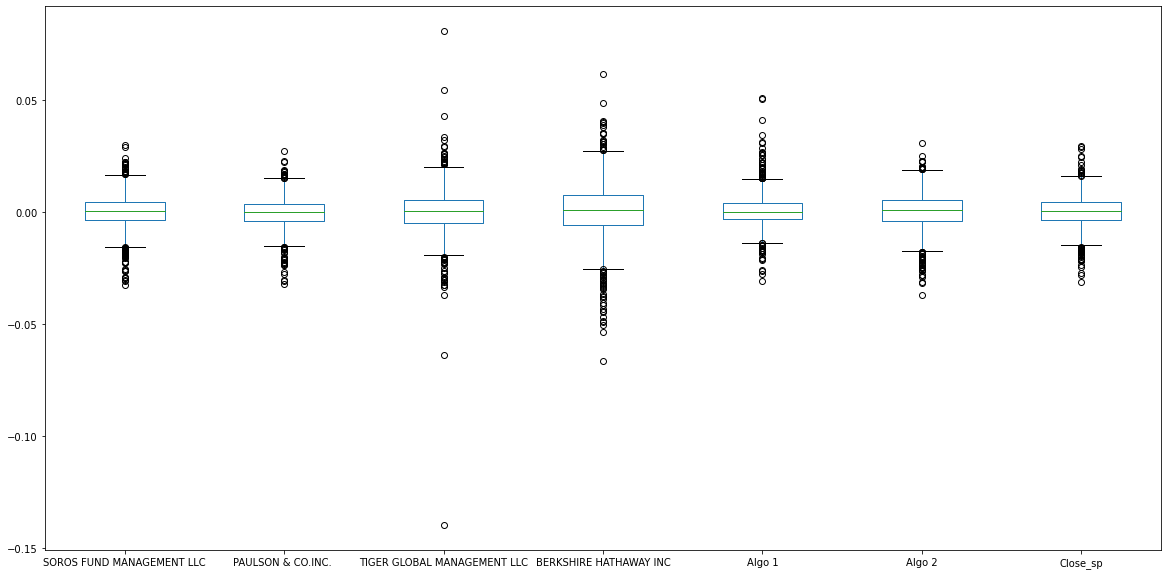

In [165]:
# Box plot to visually show risk
all_returns.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [175]:
# Calculate the daily standard deviations of all portfolios
all_daily_std = all_returns.std().sort_values(ascending=False)
all_daily_std


BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008323
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007590
Close_sp                       0.007031
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [176]:
# Calculate  the daily standard deviation of S&P TSX 60

riskier_than_SP60 =[all_daily_std > all_daily_std['Close_sp']]
riskier_than_SP60


[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 Close_sp                       False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [177]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132121
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120491
Close_sp                       0.111613
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

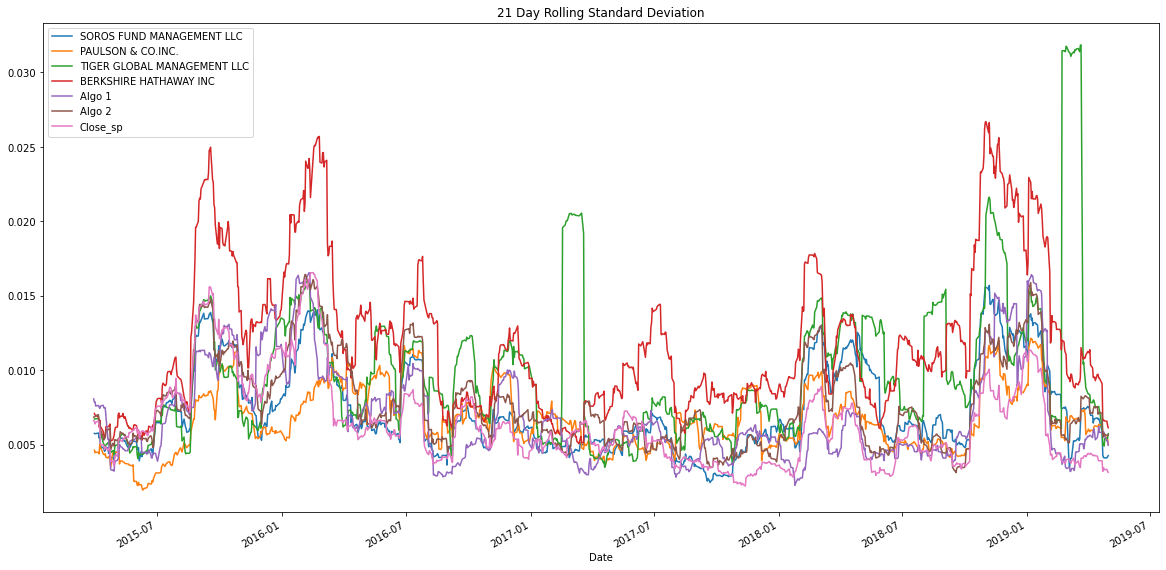

In [178]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
all_returns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))


### Calculate and plot the correlation

<AxesSubplot:>

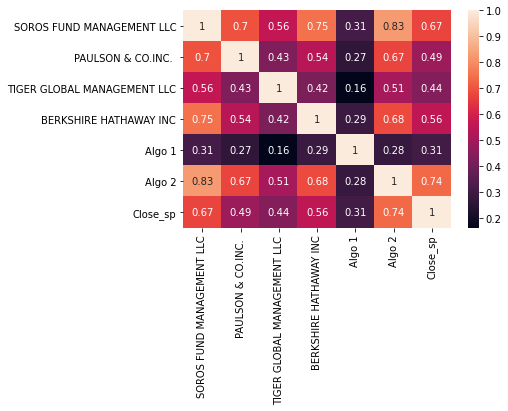

In [197]:
# Calculate the correlation
correlation = all_returns.corr()
correlation
# Display correlation matrix

import seaborn as sns
sns.heatmap(correlation, annot = True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

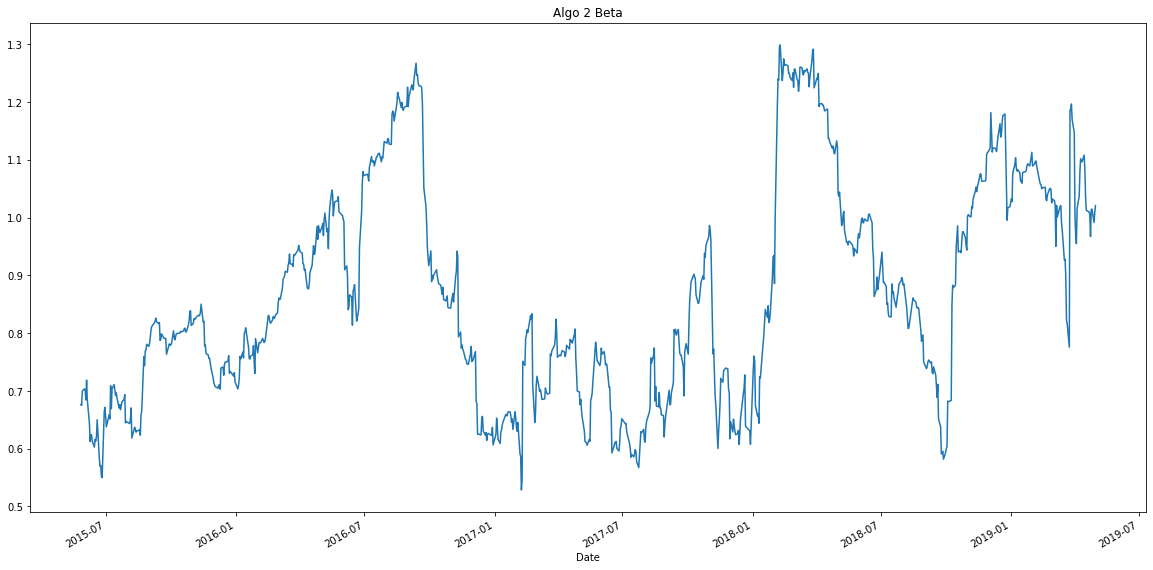

In [200]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P TSX
# Computing beta
# Plot beta trend
algo_2_covariance = all_returns['Algo 2'].rolling(window=60).cov(all_returns['Close_sp'])
algo_2_covariance

variance = all_returns['Close_sp'].rolling(window=60).var()
variance


algo_2_beta = algo_2_covariance / variance
algo_2_beta_plot = algo_2_beta.plot(title="Algo 2 Beta", figsize=(20, 10))



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

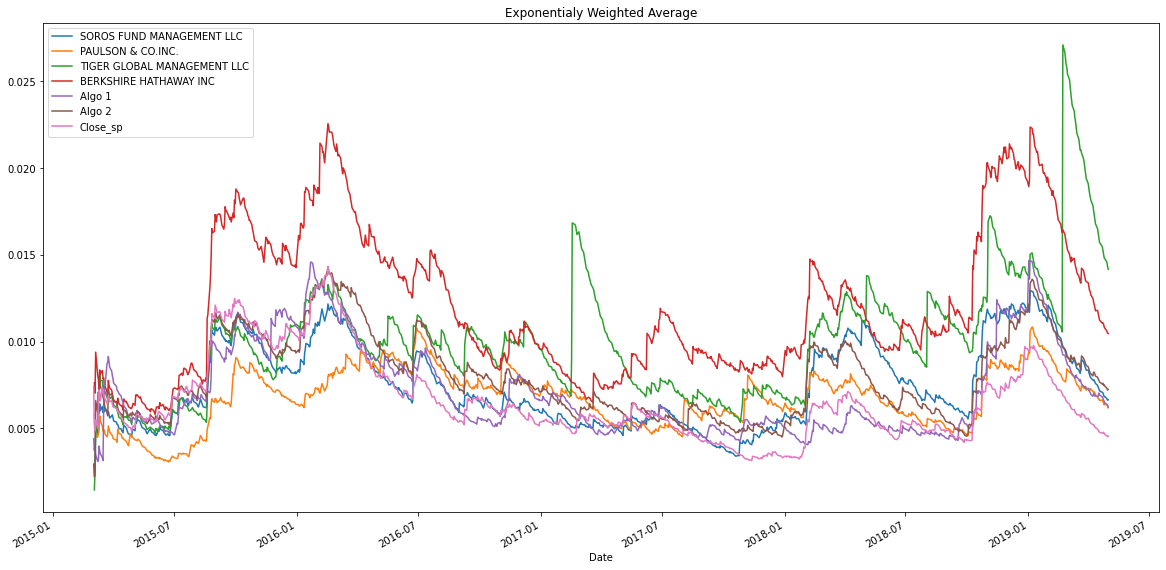

In [201]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = all_returns.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [202]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
Algo 2                         0.402526
Close_sp                       0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

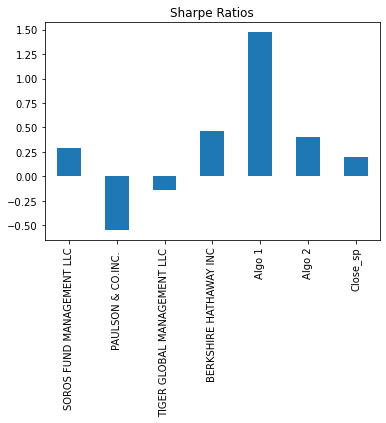

In [203]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [216]:
# Reading data from 1st stock
shopify_csv =  Path("Resources/shop_historical.csv")
shopify_csv = pd.read_csv(shopify_csv, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
shopify_csv.drop('Symbol',  axis='columns', inplace=True)
shopify_csv.rename(columns = {"Close":"SHOP"}, inplace = True)
shopify_csv.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [214]:
# Reading data from 2nd stock
otex_csv =  Path("Resources/otex_historical.csv")
otex_csv = pd.read_csv(otex_csv, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
otex_csv.drop('Symbol',  axis='columns', inplace=True)
otex_csv.rename(columns = {"Close":"OTEX"}, inplace = True)
otex_csv.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [215]:
# Reading data from 3rd stock
loblaw_csv =  Path("Resources/l_historical.csv")
loblaw_csv = pd.read_csv(loblaw_csv, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
loblaw_csv.drop('Symbol',  axis='columns', inplace=True)
loblaw_csv.rename(columns = {"Close":"L"}, inplace = True)

loblaw_csv.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [282]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([shopify_csv, otex_csv, loblaw_csv], axis="columns", join="inner")
all_stocks



,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [284]:
# Reset Date index
all_stocks.dtypes

SHOP    float64
OTEX    float64
L       float64
dtype: object

In [285]:
# Calculate daily returns
all_stocks_daily_returns = all_stocks.pct_change()
all_stocks_daily_returns.head()

# Drop NAs
all_stocks_daily_returns.dropna(inplace=True)
all_stocks_daily_returns.isnull().sum()

# Display sample data
all_stocks_daily_returns.head()

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [303]:
# Set weights
weights = [1/3, 1/3, 1/3]
all_stocks_wighted_returns = all_stocks_daily_returns.dot(weights)
all_stocks_wighted_returns.head()
all_stocks_wighted_returns = all_stocks_wighted_returns.rename("Custom")
all_stocks_wighted_returns.head()

# Calculate portfolio return

# Display sample data


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [304]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios_2_df = pd.concat([whale_df, algo_returns_df, sp_tsx_daily_returns, all_stocks_wighted_returns], axis='columns', join='inner')
combined_portfolios_2_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close_sp,Custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [288]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [305]:
# Calculate the annualized `std`
all_stocks_anual = (all_stocks.mean() * 252) / (all_stocks.std() * np.sqrt(252))
all_stocks_anual

SHOP     37.439396
OTEX    172.208435
L       153.128206
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

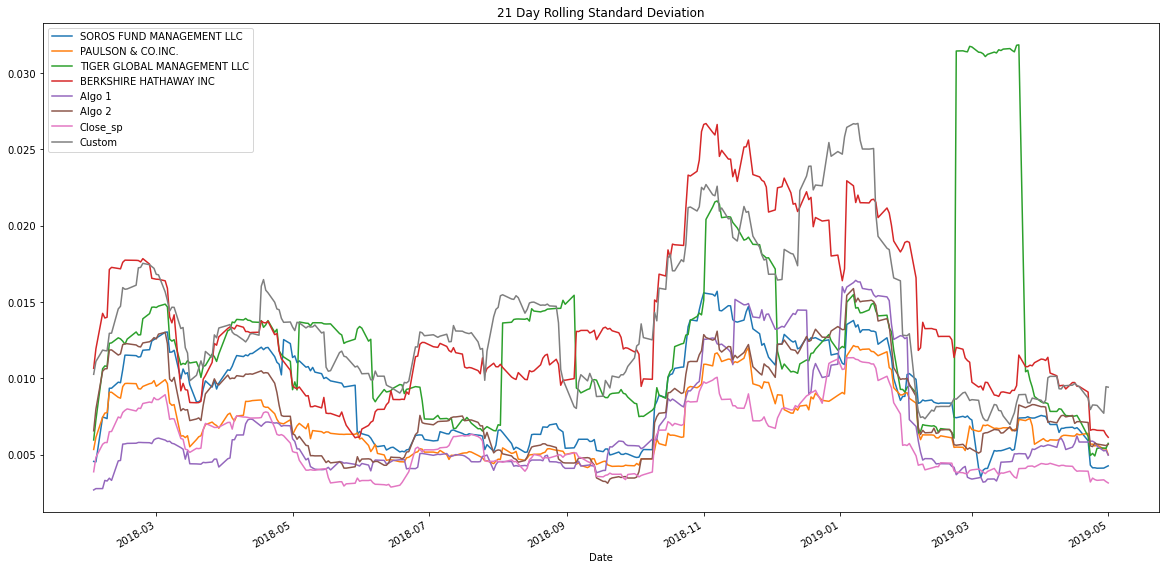

In [306]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
combined_portfolios_2_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

In [307]:
# Calculate and plot the correlation
combined_portfolios_2_df_correlation = combined_portfolios_2_df.corr()
combined_portfolios_2_df_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close_sp,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
Close_sp,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
Custom,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

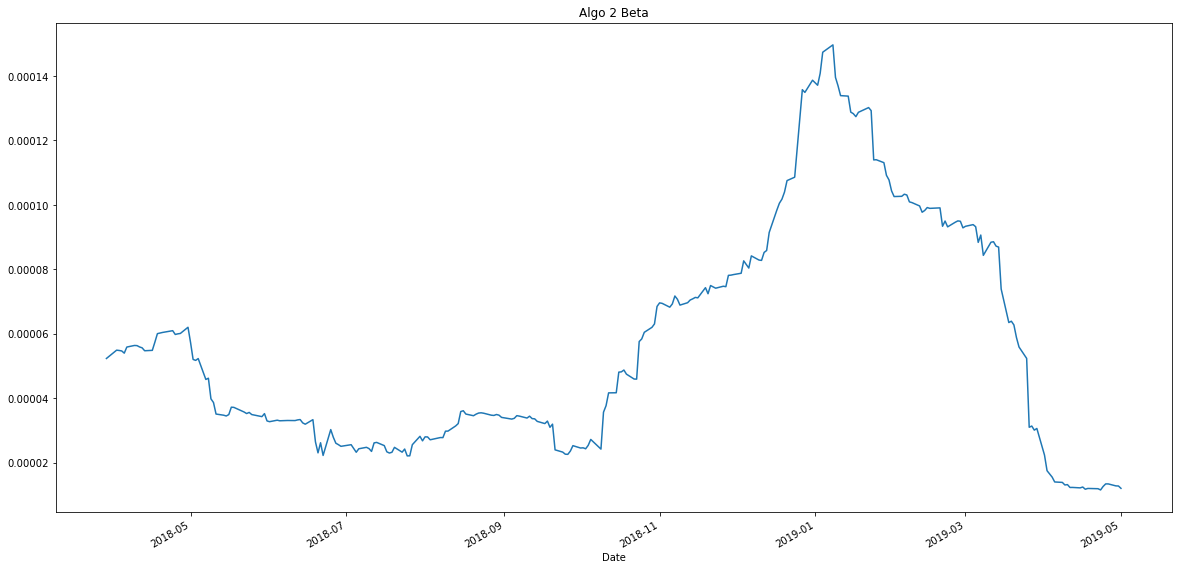

In [309]:
# Calculate and plot Beta
custom_covariance = combined_portfolios_2_df['Custom'].rolling(window=60).cov(combined_portfolios_2_df['Close_sp'])
custom_covariance
custom_covariance = custom_covariance.plot(title="Algo 2 Beta", figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [310]:
# Calculate Annualzied Sharpe Ratios
combined_portfolios_2_df_sharpe_ratios = (combined_portfolios_2_df.mean() * 252) / (combined_portfolios_2_df.std() * np.sqrt(252))
combined_portfolios_2_df_sharpe_ratios.sort_values(ascending=False)


Algo 1                         1.901461
Custom                         1.564547
BERKSHIRE HATHAWAY INC         0.195907
Close_sp                       0.034651
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

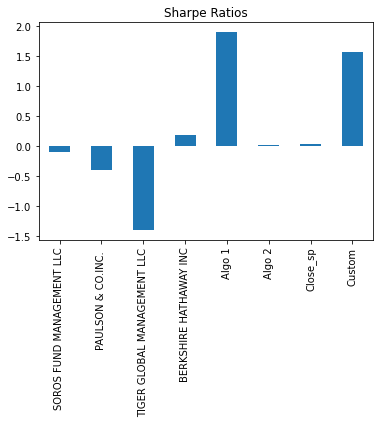

In [311]:
# Visualize the sharpe ratios as a bar plot
combined_portfolios_2_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


### How does your portfolio do?

Write your answer here!